<a href="https://colab.research.google.com/github/subhamdash/Edyoda/blob/master/Credit_card_details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
%cd drive/My\ Drive/

[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


In [124]:
ls

 Airplanes_Annotations/
 backup/
 bank.csv
 bank-full.csv
 bank-names.txt
 bank.zip
'BRILLIO DRIVE WILLINGNESS 2020.xlsx'
 Classroom/
'Colab Notebooks'/
 Corona/
 Credit_card_details.ipynb
'ct scan'/
 darknet/
 darknet-master.zip
 darknet.py
 default_credit_card_clients.xls
 Images/
'Marks for CO-PO-PSE-BTech-Attainment1112.xlsx'
 my_model_weights.h5
'New Text Document.txt'
 Resume.pdf
'SE LAB GRADE SHEET.gsheet'
'SE LAB GRADE SHEET.xlsx'
 SRS15011639.docx
 SRS15011639.gdoc
 srs.docx
'Subham_EdYoda - Admission Test_1576151548541.pdf'
 yolo/
 yolov3.weights


# Importing and cleaning

In [125]:
import pandas as pd

In [126]:
df=pd.read_excel('default_credit_card_clients.xls',header=1)

In [127]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


There are 25 variables:

    ID: ID of each client

    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

    SEX: Gender (1=male, 2=female)

    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)

    AGE: Age in years

    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay 
    for one month, 2=payment delay for two months, ... 8=payment delay for
     eight months, 9=payment delay for nine months and above)

    PAY_2: Repayment status in August, 2005 (scale same as above)

    PAY_3: Repayment status in July, 2005 (scale same as above)

    PAY_4: Repayment status in June, 2005 (scale same as above)

    PAY_5: Repayment status in May, 2005 (scale same as above)

    PAY_6: Repayment status in April, 2005 (scale same as above)

    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

    default.payment.next.month: Default payment (1=yes, 0=no)




In [128]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30,000 distinct credit card clients.

The mean amount is 1,67,484

Average age is 35.5 years, with a standard deviation of 9.2.

In [129]:
total = df.isnull().sum().sort_values(ascending = False)
total


default payment next month    0
PAY_6                         0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
BILL_AMT1                     0
PAY_AMT6                      0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
ID                            0
dtype: int64

In [130]:
df.rename(columns={'default payment next month':'default_payment'},inplace=True)

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt


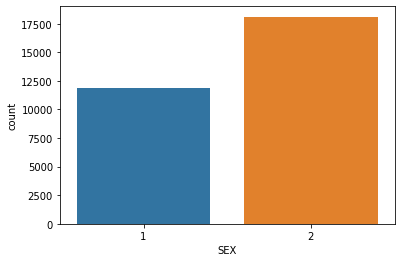

In [132]:
sns.countplot(df.SEX)

There are less male and more female.

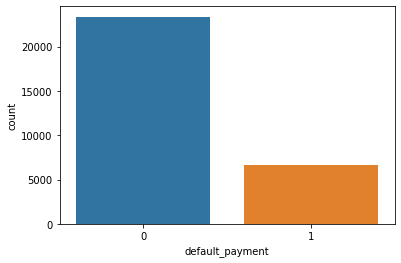

In [133]:
sns.countplot(df.default_payment)

In [134]:
df.default_payment.value_counts()

0    23364
1     6636
Name: default_payment, dtype: int64

A number of 6,636 out of 30,000 (or 22%) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

There is no null values.We can't treat zero value as valid for all the features also. 

In [135]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

1=married, 2=single, 3=others so we will combine 0 and 3 to one value.
We will make it to zero.

In [136]:
df.loc[df['MARRIAGE']==3,'MARRIAGE']=0

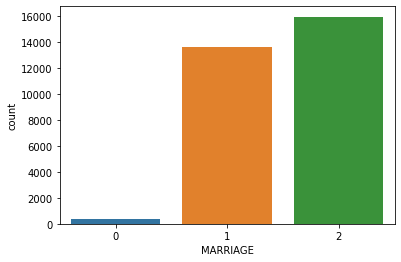

In [137]:
sns.countplot(df['MARRIAGE'])

In [138]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Education can have a value 0 which was not known before. Grouping 0,4,5,6 as unknowns. Replacing any education greater than or equal to four with 0

In [139]:
df.loc[df['EDUCATION']>=4,'EDUCATION']=0

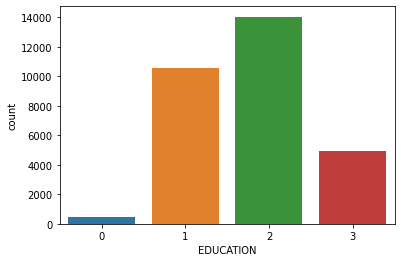

In [140]:
sns.countplot(df['EDUCATION'])

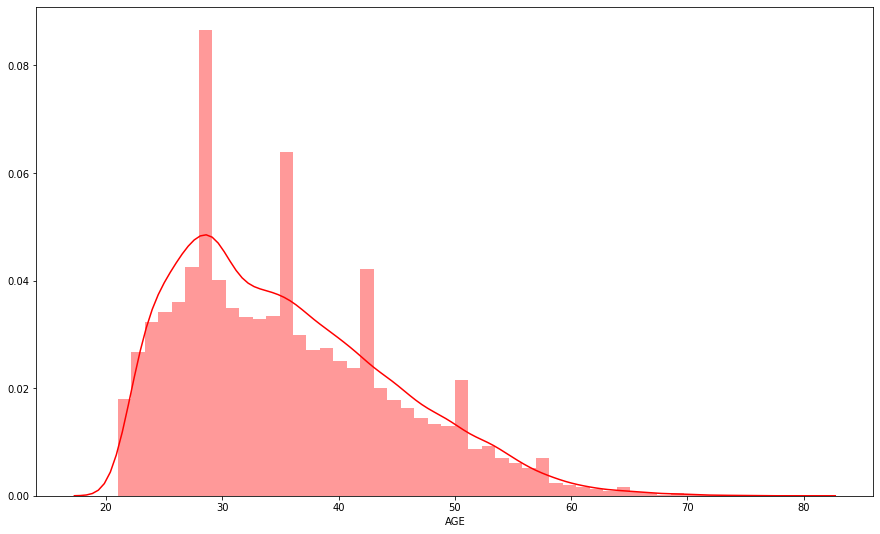

In [141]:
f, axes = plt.subplots( figsize=(15, 9))

sns.distplot(df['AGE'] , color="red")

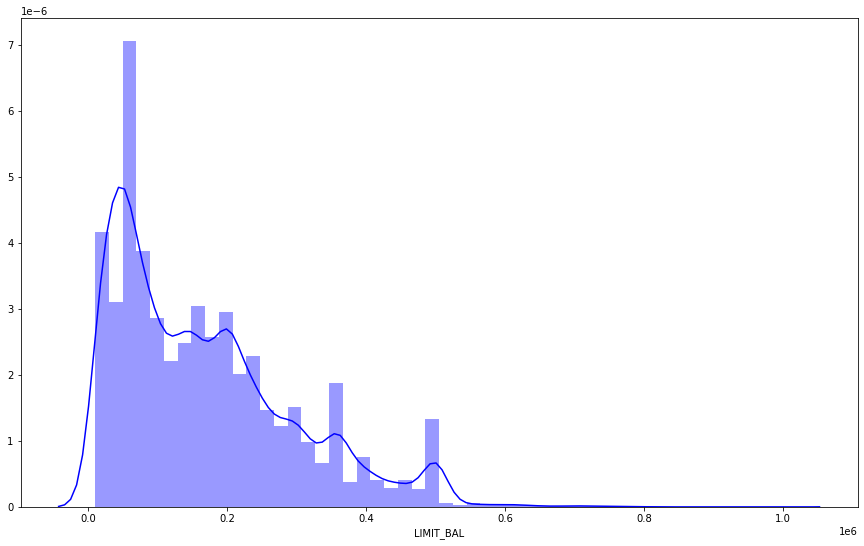

In [142]:
f, axes = plt.subplots( figsize=(15, 9))

sns.distplot(df['LIMIT_BAL'] , color="blue")

# Age and limit_bal is not normally distributed and have left skewness 


In [143]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [144]:
Payment_status=df.filter(regex='PAY_\d')

In [145]:
Payment_status.PAY_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

 (-1=pay duly, 1=payment delay 
for one month, 2=payment delay for two months, ... 8=payment delay for
 eight months, 9=payment delay for nine months and above).
The PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. Then what is -2? And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.

In [146]:
for i in Payment_status.columns:
  print(i)
  print(df[i].unique())

    

PAY_1
[ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2
[ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3
[-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4
[-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5
[-2  0 -1  2  3  5  4  7  8  6]
PAY_6
[-2  2  0 -1  3  6  4  7  8  5]


 There is no value of 9 in the PAY_.We may condider (1-9) scale as (0-8) and -1,-2 are pay duly or

We can assume everyone has paid the amount before 9 months so no one has value 9 and 0,-1,-2 are pay duly .

So I will go with later.

In [147]:
for i in Payment_status.columns:
  df[i]=df[i].map(lambda v:0 if v<0 else v)


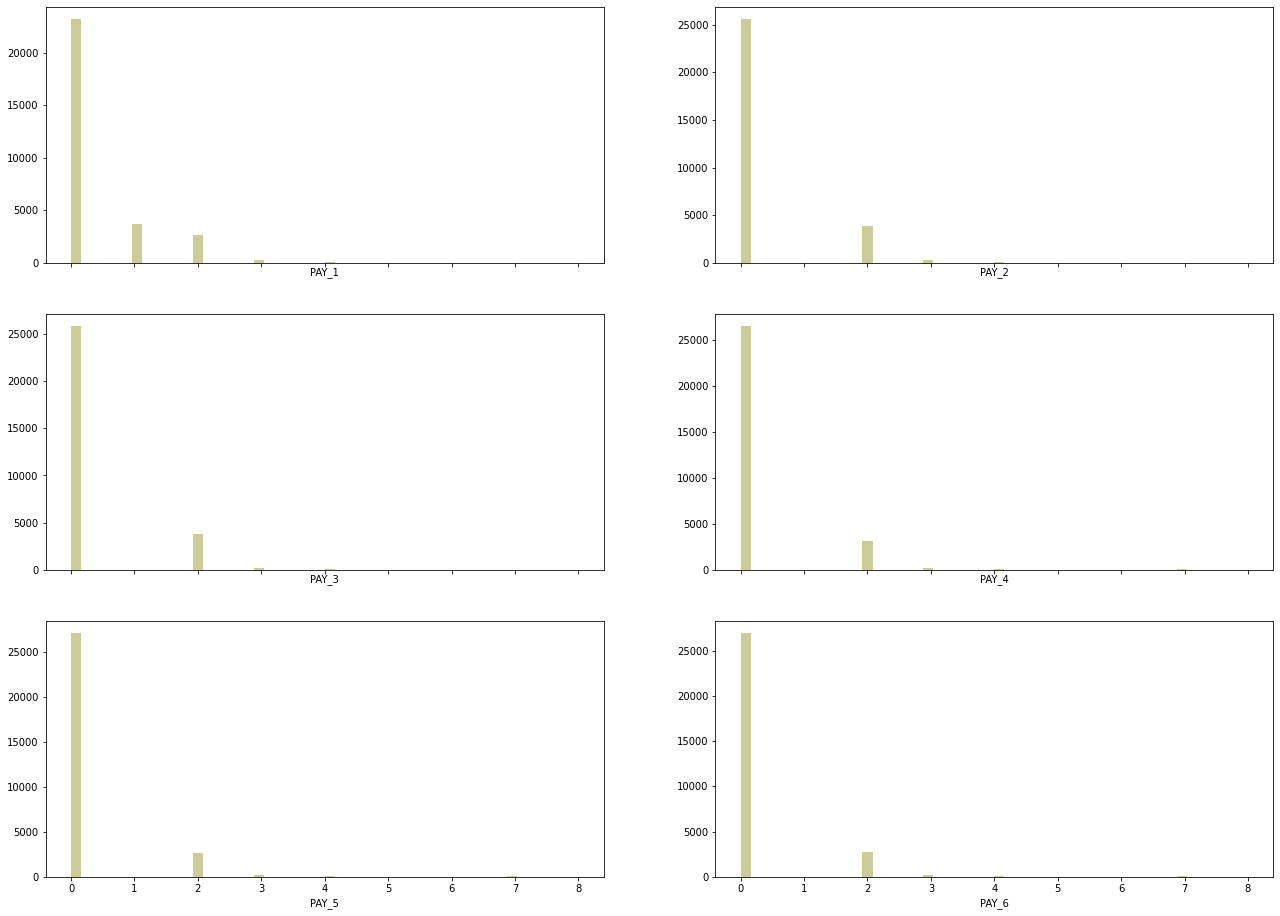

In [148]:
f, axes = plt.subplots(3, 2, figsize=(22, 16), sharex=True)
j=0
k=0
for i in Payment_status.columns:
  sns.distplot( df[i] , color="olive", ax=axes[j, k],kde=False)
  if(k==1):
    j+=1
    j=j%3
  k+=1
  k=k%2



It's clear majority of person has paid the amount early.

In [149]:
Payment_amt_status=df.filter(regex='PAY_AMT\d')

In [150]:
Payment_amt_status

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
29995,8500,20000,5003,3047,5000,1000
29996,1837,3526,8998,129,0,0
29997,0,0,22000,4200,2000,3100
29998,85900,3409,1178,1926,52964,1804


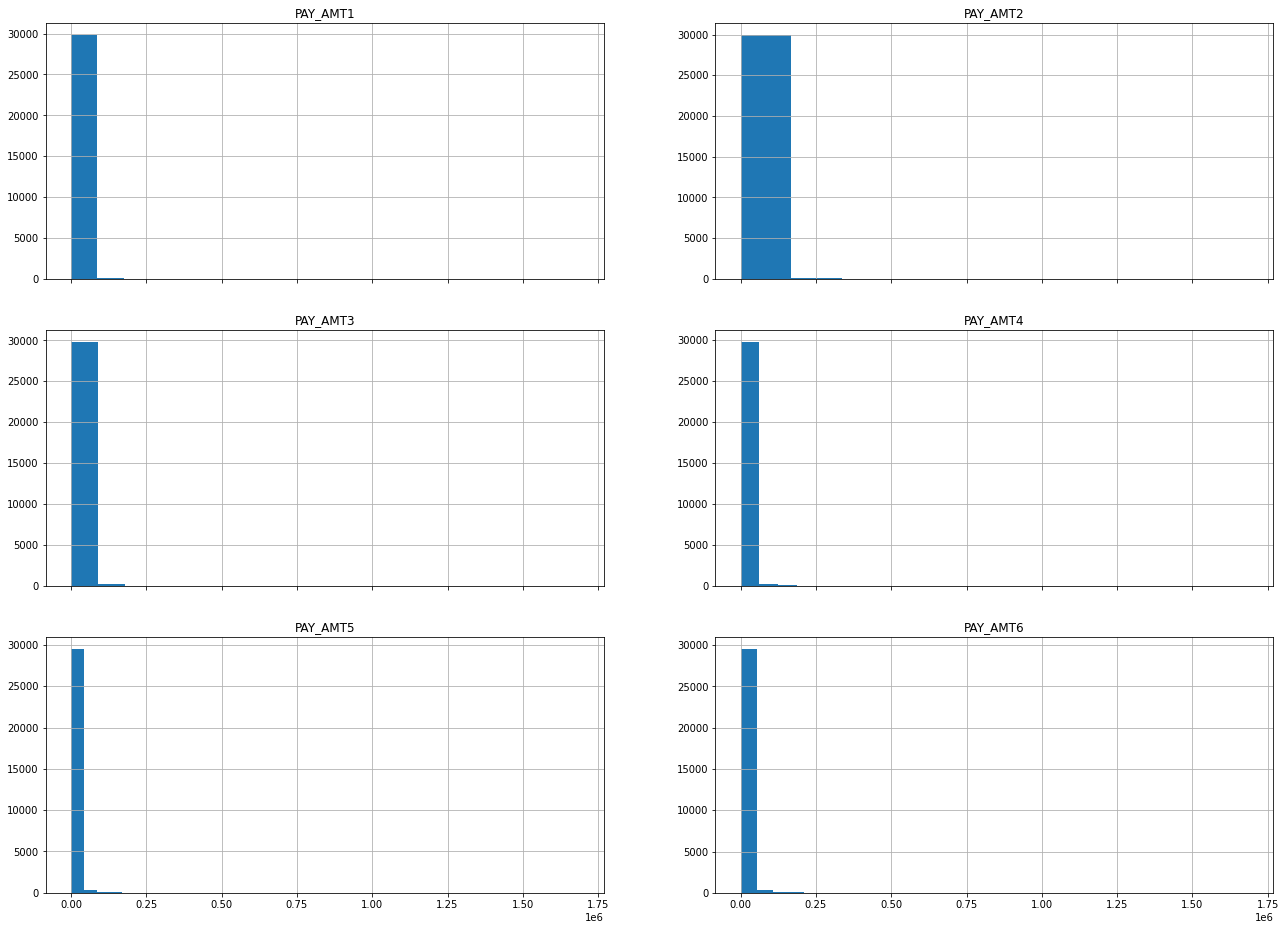

In [151]:
f, axes = plt.subplots(3, 2, figsize=(22, 16), sharex=True)
j=0
k=0
for i in Payment_amt_status.columns:
  #sns.distplot( df[i] , color="olive", ax=axes[j, k],kde=False)
  ax=axes[j, k]
  df[i].hist(ax=ax)
  ax.set_title(i)
  if(k==1):
    j+=1
    j=j%3
  k+=1
  k=k%2

In [152]:
bill_amt_status=df.filter(regex='BILL_AMT\d')

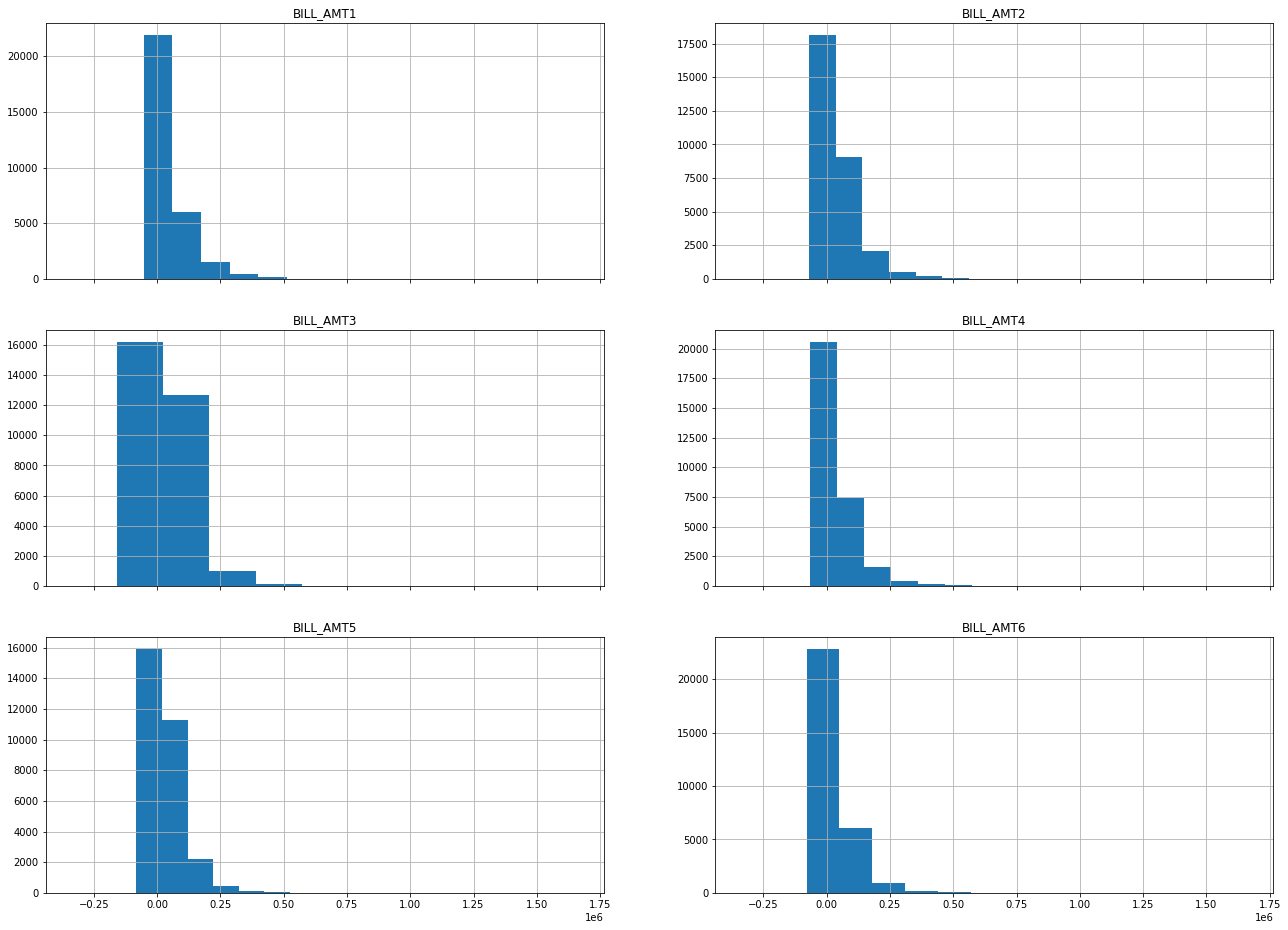

In [153]:
f, axes = plt.subplots(3, 2, figsize=(22, 16), sharex=True)
j=0
k=0
for i in bill_amt_status.columns:
  #sns.distplot( df[i] , color="olive", ax=axes[j, k],kde=False)
  ax=axes[j, k]
  df[i].hist(ax=ax)
  ax.set_title(i)
  if(k==1):
    j+=1
    j=j%3
  k+=1
  k=k%2

The quantities referred to some amount of money have a very large range, which can cause problems to some some models (for example in linear regression models).
But can we consider those amount as Outlier ?
Let's see

In [154]:
df['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

# Terms releated to credit card. 

Limit balance:-This is the maximum amount of credit that you are allowed to borrow on your card. Cards issue the credit limit based on several factors.

Credit Limit:-Max amount you are given to use.
Available credit:- The amount you can use for purchase.

Last bill amount:-Previous month's pending balance

Payments and credits:-Last month's payments and credit 

New purchase:-Total amount you have made within the current statements period.

Total amount due:- The amount we have to pay b4 due date.

Minimum amount:-If you cannot pay full total amount you have to pay minimum amount due.

If we just pay the minimum amount there will also be interst charged on total out standing amount.






**Different people have different ways of paying their credit card dues. Some cardholders pay the entire outstanding amount as and when it is due while others can only manage to pay the minimum amount. Also, there are some who make several payments in a month in order to reduce the debt and at the same time maintain sufficient cash flow. But which of these is a good payment strategy? Let us discuss in some detail-**


*   Paying the Minimum Amount Due- It is not advised to make the minimum payment every month because the rest of the outstanding amount gets rolled over to the next statement. Any amount that remains outstanding in your account incurs interest charges. Credit cards, being one of the most expensive forms of debt, can ruin your financial condition if you do not pay the total outstanding amount per month.


*   Paying the Total Outstanding Amount- This is the best practice. You should make the payment of the total amount due on or before the due date. This way the interest-free period will also be applied every month plus there would be no penalty or extra finance charges.


*   Paying More Than the Total Outstanding Amount- If you pay an amount higher than the total outstanding value, this will be shown in your statement as a negative balance. It is a form of extra credit added to your existing credit limit but it is not given by the bank. This method is helpful when you want to make a big purchase but you don’t have enough credit left. Say, you want to purchase an item worth Rs. 37,000 but your credit card has a limit of only Rs. 30,000. In this case, you can pay Rs. 7,000 extra and then purchase the item. However, this is not an advisable practice. 

In [155]:
df[df.PAY_AMT1 > 30000][['LIMIT_BAL','BILL_AMT6', 'PAY_AMT6' ,'PAY_6', 'BILL_AMT5', 'PAY_AMT5','PAY_5',
                           'BILL_AMT4','PAY_AMT4', 'PAY_4', 'BILL_AMT3', 'PAY_AMT3', 'PAY_3', 'BILL_AMT2', 'PAY_AMT2','PAY_2', 'BILL_AMT1', 'PAY_AMT1','PAY_1','default_payment']]

,LIMIT_BAL,BILL_AMT6,PAY_AMT6,PAY_6,BILL_AMT5,PAY_AMT5,PAY_5,BILL_AMT4,PAY_AMT4,PAY_4,BILL_AMT3,PAY_AMT3,PAY_3,BILL_AMT2,PAY_AMT2,PAY_2,BILL_AMT1,PAY_AMT1,PAY_1,default_payment
6,500000,473944,13770,0,483003,13750,0,542653,20239,0,445007,38000,0,412023,40000,0,367965,55000,0,0
88,130000,1190,2090,0,7095,1190,0,1330,7095,0,17740,1330,0,117866,5000,0,81313,40000,0,0
182,500000,70064,20000,0,108834,52183,0,122967,20000,0,110340,30000,0,110616,30357,0,56422,70010,0,0
186,360000,16240,38313,0,13881,16250,0,68445,13889,0,5287,68454,0,57077,5295,0,2616,57087,1,0
193,180000,0,0,0,0,0,0,10200,0,0,21282,200,2,22087,0,0,14670,37867,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29948,290000,0,0,0,910,0,0,1956,4,0,200,1961,0,38752,201,0,31933,39032,0,0
29963,610000,269528,220076,0,248893,271099,0,347303,250144,0,319014,349395,2,322228,1605,0,348392,323014,0,0
29970,360000,19487,16080,0,8676,19584,0,49005,53,0,64069,8907,0,52686,64535,0,33654,52951,0,0
29988,250000,179687,6009,0,175005,7000,0,245750,6000,0,243075,9011,0,252913,8800,0,279640,65000,0,0


I am safely assuming that:  

1.  BILL_AMT is the amount a person has spend on that specific month and
PAY_AMT is the remaining amount from previous month's total amount.

        eg:- For the case of id=29948.
        He joined in the month of the MAY.
        His total expenses for that month is 910 and he has no due payment as he took the credit card in that month
        Now he paid some amount may be 905/906 now after charging intrest his remainging balance is four in the month of june.
        In the month of the june he has a bill of 1956.
        Total amount he has to pay is 1956$(june's bill)+4$(from previous months)=2000$
        and it conitues
        
2.   As delay occur he may have to pay extra money as interst and as fine.

3.  We don't have a data that how much a person pays we only know his spending amount and amount previous remaining amount.

4.  Some people issued their credit card on the latter months of april that's a reason why their initial month values are zero.

5.  There are some rich people who take huge money compared to average amount so we cannot consider them as outliers. 


I have taken the data in reverse order as BILL_AMT1 and PAY_AMT1 represent the bills from september and BILL_AMT6 and PAY_AMT6 represnts bill of April of the same year.

In [156]:
df[df.default_payment ==1][['LIMIT_BAL','BILL_AMT1', 'PAY_AMT1', 'PAY_1', 'BILL_AMT2', 'PAY_AMT2','PAY_2', 'BILL_AMT3', 'PAY_AMT3','PAY_3','default_payment']].sample(30)

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,PAY_1,BILL_AMT2,PAY_AMT2,PAY_2,BILL_AMT3,PAY_AMT3,PAY_3,default_payment
4390,10000,8660,1800,0,9756,1300,0,8560,800,0,1
11907,130000,19085,0,3,18491,2400,2,20579,0,2,1
5286,520000,485298,22000,0,499489,18300,0,413019,26500,0,1
14378,50000,41827,1800,2,42650,4000,0,45930,0,0,1
29878,340000,362178,10116,0,303611,3300,0,92112,5000,0,1
27858,110000,30079,1494,2,29349,1402,0,27630,1534,0,1
1121,20000,19977,2000,1,21359,0,2,20581,0,4,1
11034,30000,5685,0,2,5448,2000,2,7347,800,0,1
29118,200000,570,52439,2,52439,0,0,51040,6000,2,1
20371,20000,8038,1161,0,9060,2701,0,11600,1204,0,1


It seems that if by september I have a bill too close to my limit, I generally fail. However, I can already see some dramatic exceptions.

In [157]:
df[ (df.PAY_AMT1 > df.BILL_AMT2) & (df.PAY_1>0) & (df.default_payment==1) ][['LIMIT_BAL','BILL_AMT1', 'PAY_AMT1', 'BILL_AMT2', 'PAY_AMT2','PAY_1','PAY_2', 'BILL_AMT3', 'PAY_AMT3','PAY_3','default_payment']].sample(30)

,LIMIT_BAL,BILL_AMT1,PAY_AMT1,BILL_AMT2,PAY_AMT2,PAY_1,PAY_2,BILL_AMT3,PAY_AMT3,PAY_3,default_payment
6096,60000,749,60295,44893,3000,1,0,34812,3020,0,1
9255,110000,-100,500,200,400,1,0,400,46952,0,1
3625,330000,-13,2763,2750,0,1,0,-27,5371,0,1
932,160000,1989,0,-8,874,2,2,866,0,0,1
11277,340000,-11,0,-11,0,1,0,-11,2905,0,1
29491,320000,-6029,185,-9119,28,1,0,-46127,12,0,1
1974,130000,-2000,0,-2000,0,1,0,-2000,0,0,1
1118,140000,-150,0,-150,0,1,0,-150,0,0,1
27043,230000,-4,1500,1496,5000,1,0,4872,0,0,1
27189,120000,0,652,326,326,1,0,326,652,0,1


**Even though the BILL_AMT2 is in negative their PAY_1 showing greter value than 1.**

**If a PAY_1 is 2 then PAY_2 must have been 1.**

**Some person have Negative Value at the end of the month of September that is BILL_AMT1 still they are termed as defaulter.**

# Is it safe to take PAY_ as a feature ???

# Data Visualization


In [158]:
ff=df.groupby(['SEX', 'default_payment']).size()

In [159]:
ff

SEX  default_payment
1    0                   9015
     1                   2873
2    0                  14349
     1                   3763
dtype: int64

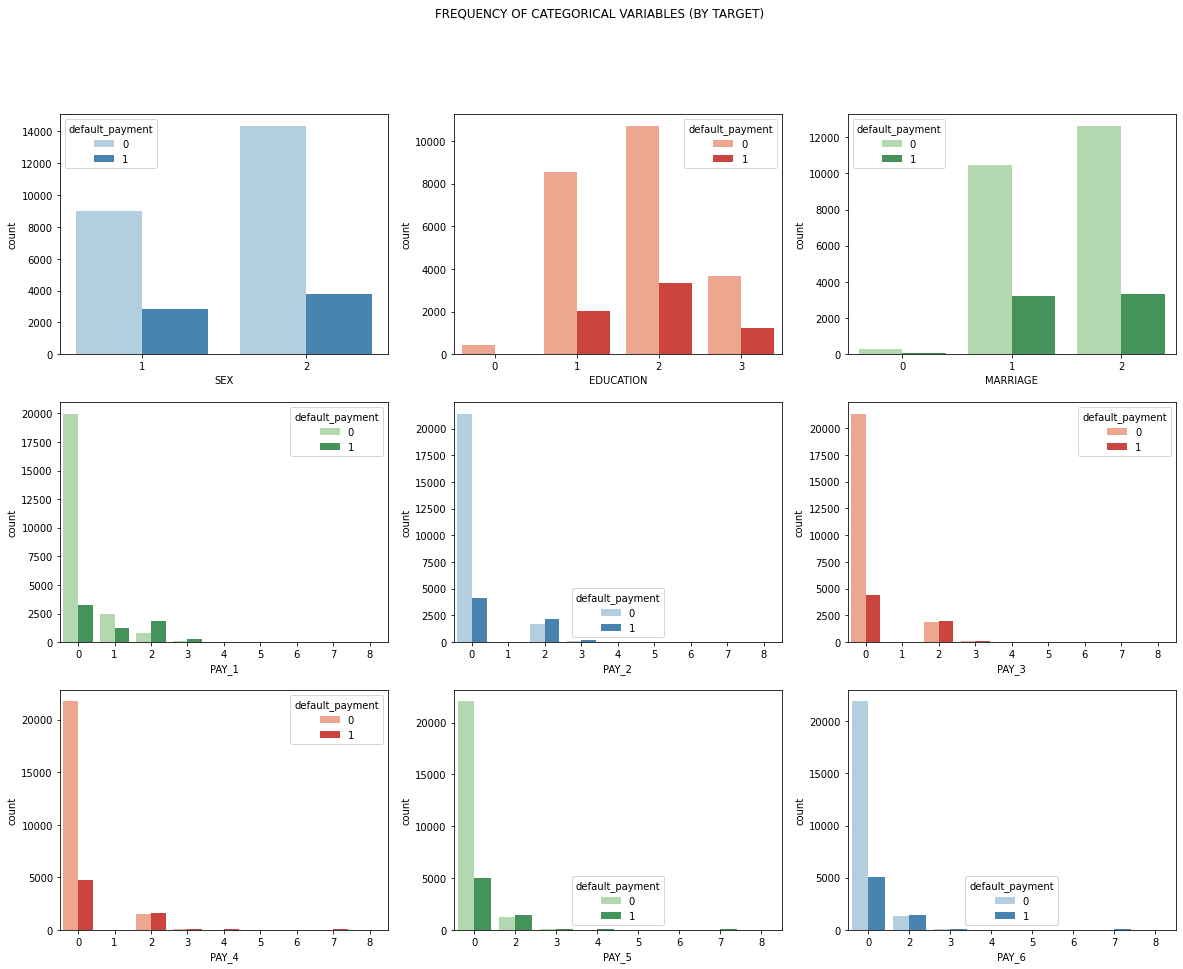

In [160]:
subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default_payment']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default_payment", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default_payment", data=subset, palette="Reds",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default_payment", data=subset, palette="Greens",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="default_payment", data=subset, palette="Greens", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default_payment", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default_payment", data=subset, palette="Reds", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default_payment", data=subset, palette="Reds", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default_payment", data=subset, palette="Greens", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default_payment", data=subset, palette="Blues", ax=axes[2,2]);

In [161]:
df[["SEX", "default_payment"]].groupby(['SEX']).mean().sort_values(by='default_payment',ascending=False)

,default_payment
SEX,
1,0.241672
2,0.207763





**From the above graph We can say 24% men are likely to go default which is more than women 20% even if the total women are more than men.**

In [162]:
df[["EDUCATION", "default_payment"]].groupby(['EDUCATION']).mean().sort_values(by='default_payment',ascending=False)

,default_payment
EDUCATION,
3,0.251576
2,0.237349
1,0.192348
0,0.070513



**It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" that, if we stick to the documentation, would be lower than high school.**


In [163]:
df[["MARRIAGE", "default_payment"]].groupby(['MARRIAGE']).mean().sort_values(by='default_payment',ascending=False)

,default_payment
MARRIAGE,
0,0.236074
1,0.234717
2,0.209283


**Here it seems that married people are most likely to default as well as the misterious category "Other" ( which is again numerically less relevant than the others)**

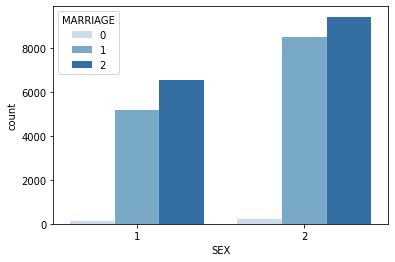

In [164]:
sns.countplot(x="SEX", hue="MARRIAGE", data=subset, palette="Blues")

In [165]:
df.groupby(['SEX', 'MARRIAGE']).size().unstack(1)

MARRIAGE,0,1,2
SEX,,,
1,145,5190,6553
2,232,8469,9411


**There are more single than married**

In [166]:
cols=[]
for i in df.columns:
    cols.append(str(i))
  
df[cols].skew()

ID                  0.000000
LIMIT_BAL           0.992867
SEX                -0.424183
EDUCATION           0.122597
MARRIAGE           -0.339868
AGE                 0.732246
PAY_1               2.809797
PAY_2               2.598928
PAY_3               2.856586
PAY_4               3.547022
PAY_5               3.966571
PAY_6               3.821385
BILL_AMT1           2.663861
BILL_AMT2           2.705221
BILL_AMT3           3.087830
BILL_AMT4           2.821965
BILL_AMT5           2.876380
BILL_AMT6           2.846645
PAY_AMT1           14.668364
PAY_AMT2           30.453817
PAY_AMT3           17.216635
PAY_AMT4           12.904985
PAY_AMT5           11.127417
PAY_AMT6           10.640727
default_payment     1.343504
dtype: float64

**PAY_,BILL_AMT,PAY_AMT all are hight skewed **

In [167]:
df[cols].kurt()

ID                   -1.200000
LIMIT_BAL             0.536263
SEX                  -1.820190
EDUCATION            -0.686761
MARRIAGE             -1.297322
AGE                   0.044303
PAY_1                12.458803
PAY_2                 7.838496
PAY_3                10.475143
PAY_4                17.160670
PAY_5                21.313411
PAY_6                19.937082
BILL_AMT1             9.806289
BILL_AMT2            10.302946
BILL_AMT3            19.783255
BILL_AMT4            11.309325
BILL_AMT5            12.305881
BILL_AMT6            12.270705
PAY_AMT1            415.254743
PAY_AMT2           1641.631911
PAY_AMT3            564.311229
PAY_AMT4            277.333768
PAY_AMT5            180.063940
PAY_AMT6            167.161430
default_payment      -0.195010
dtype: float64

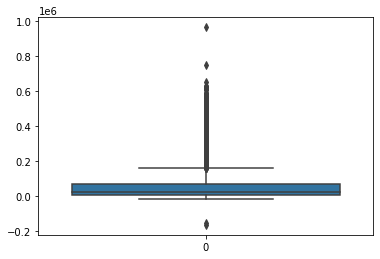

In [168]:
sns.boxplot(data=df.BILL_AMT1 )

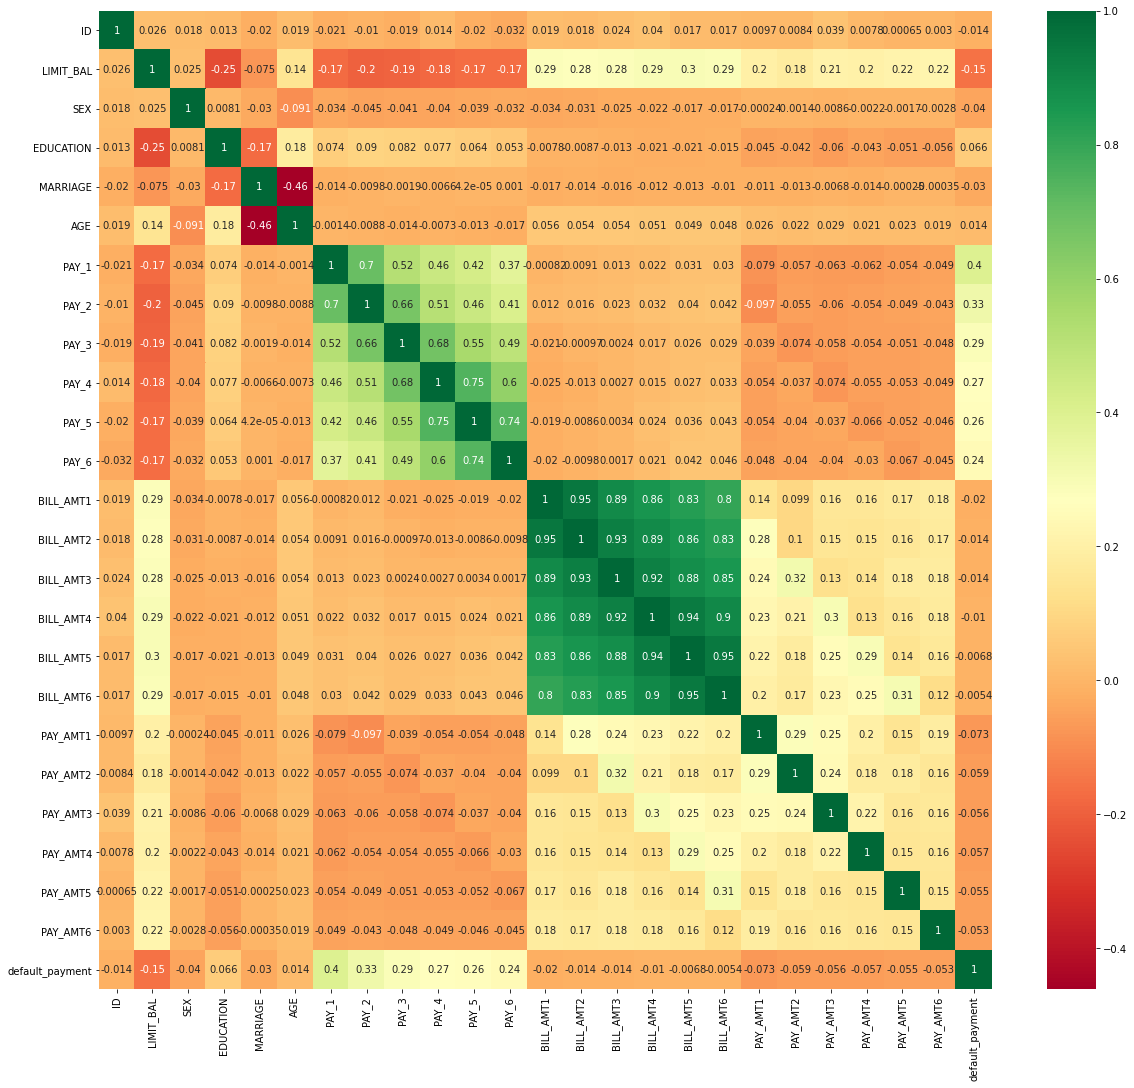

In [169]:
plt.figure(figsize=(20,18))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

Default_payment has good positive correleation with PAY_ even though it's not very clear,
negatively coreleated with LIMIT_BAL.

Apart from that BILL_AMTx has very good coreleation amaong themeselves.BILL_AMTX has very high and positive correleation among them.
PAY_x has moderate positive coreleation amaong themeselves.
Pay_amt has low positive correleation among them and negative correlation with bill_amt_status

Sex,Education and marraige doesn't have enough stong coorelation with default_payment.


In [170]:
df_copy=df[[ 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default_payment']]

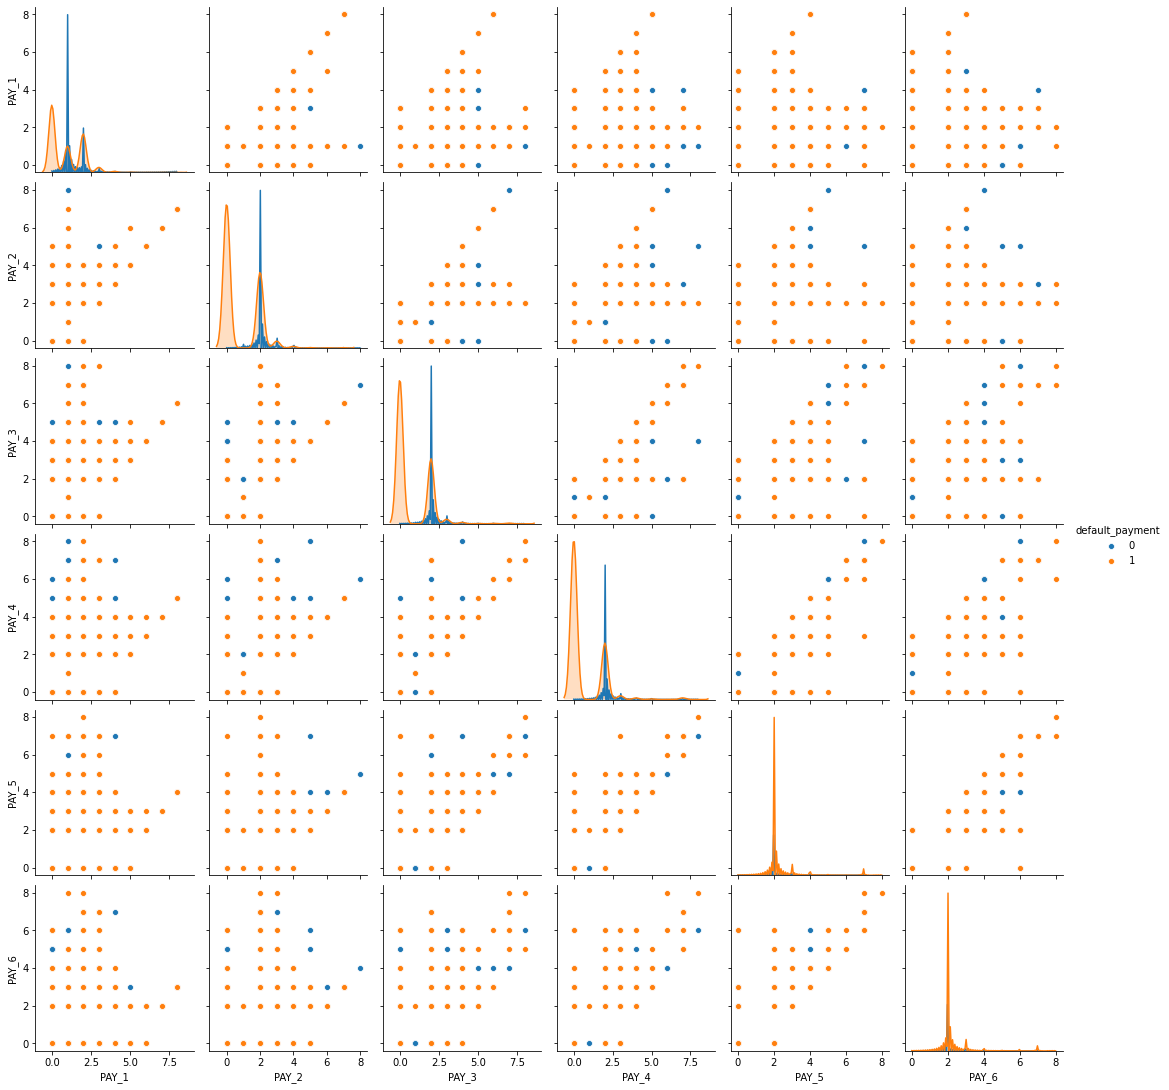

In [171]:
sns.pairplot(df_copy, hue = 'default_payment')



In [172]:
df_copy1=df[[ 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
               'BILL_AMT5', 'BILL_AMT6', 'default_payment']]

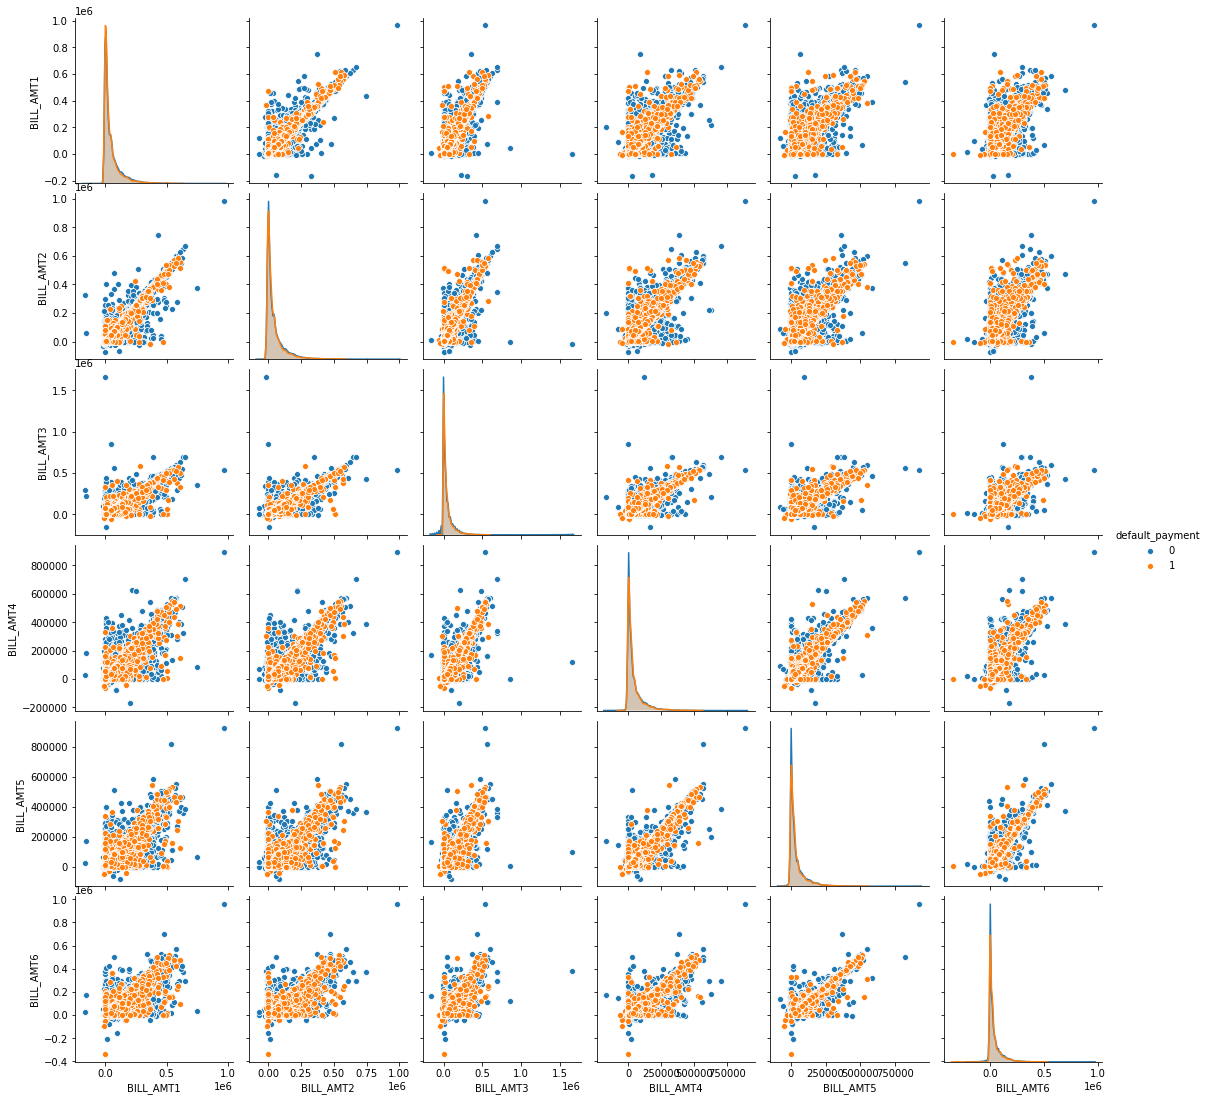

In [173]:
sns.pairplot(df_copy1, hue = 'default_payment')


Clearly we can see a poitive linear relationship among all the BILL_AMTX

In [174]:
df_copy2=df[[ 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4','BILL_AMT5' ,'BILL_AMT6',
               'PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5' ,'PAY_AMT6','default_payment']]

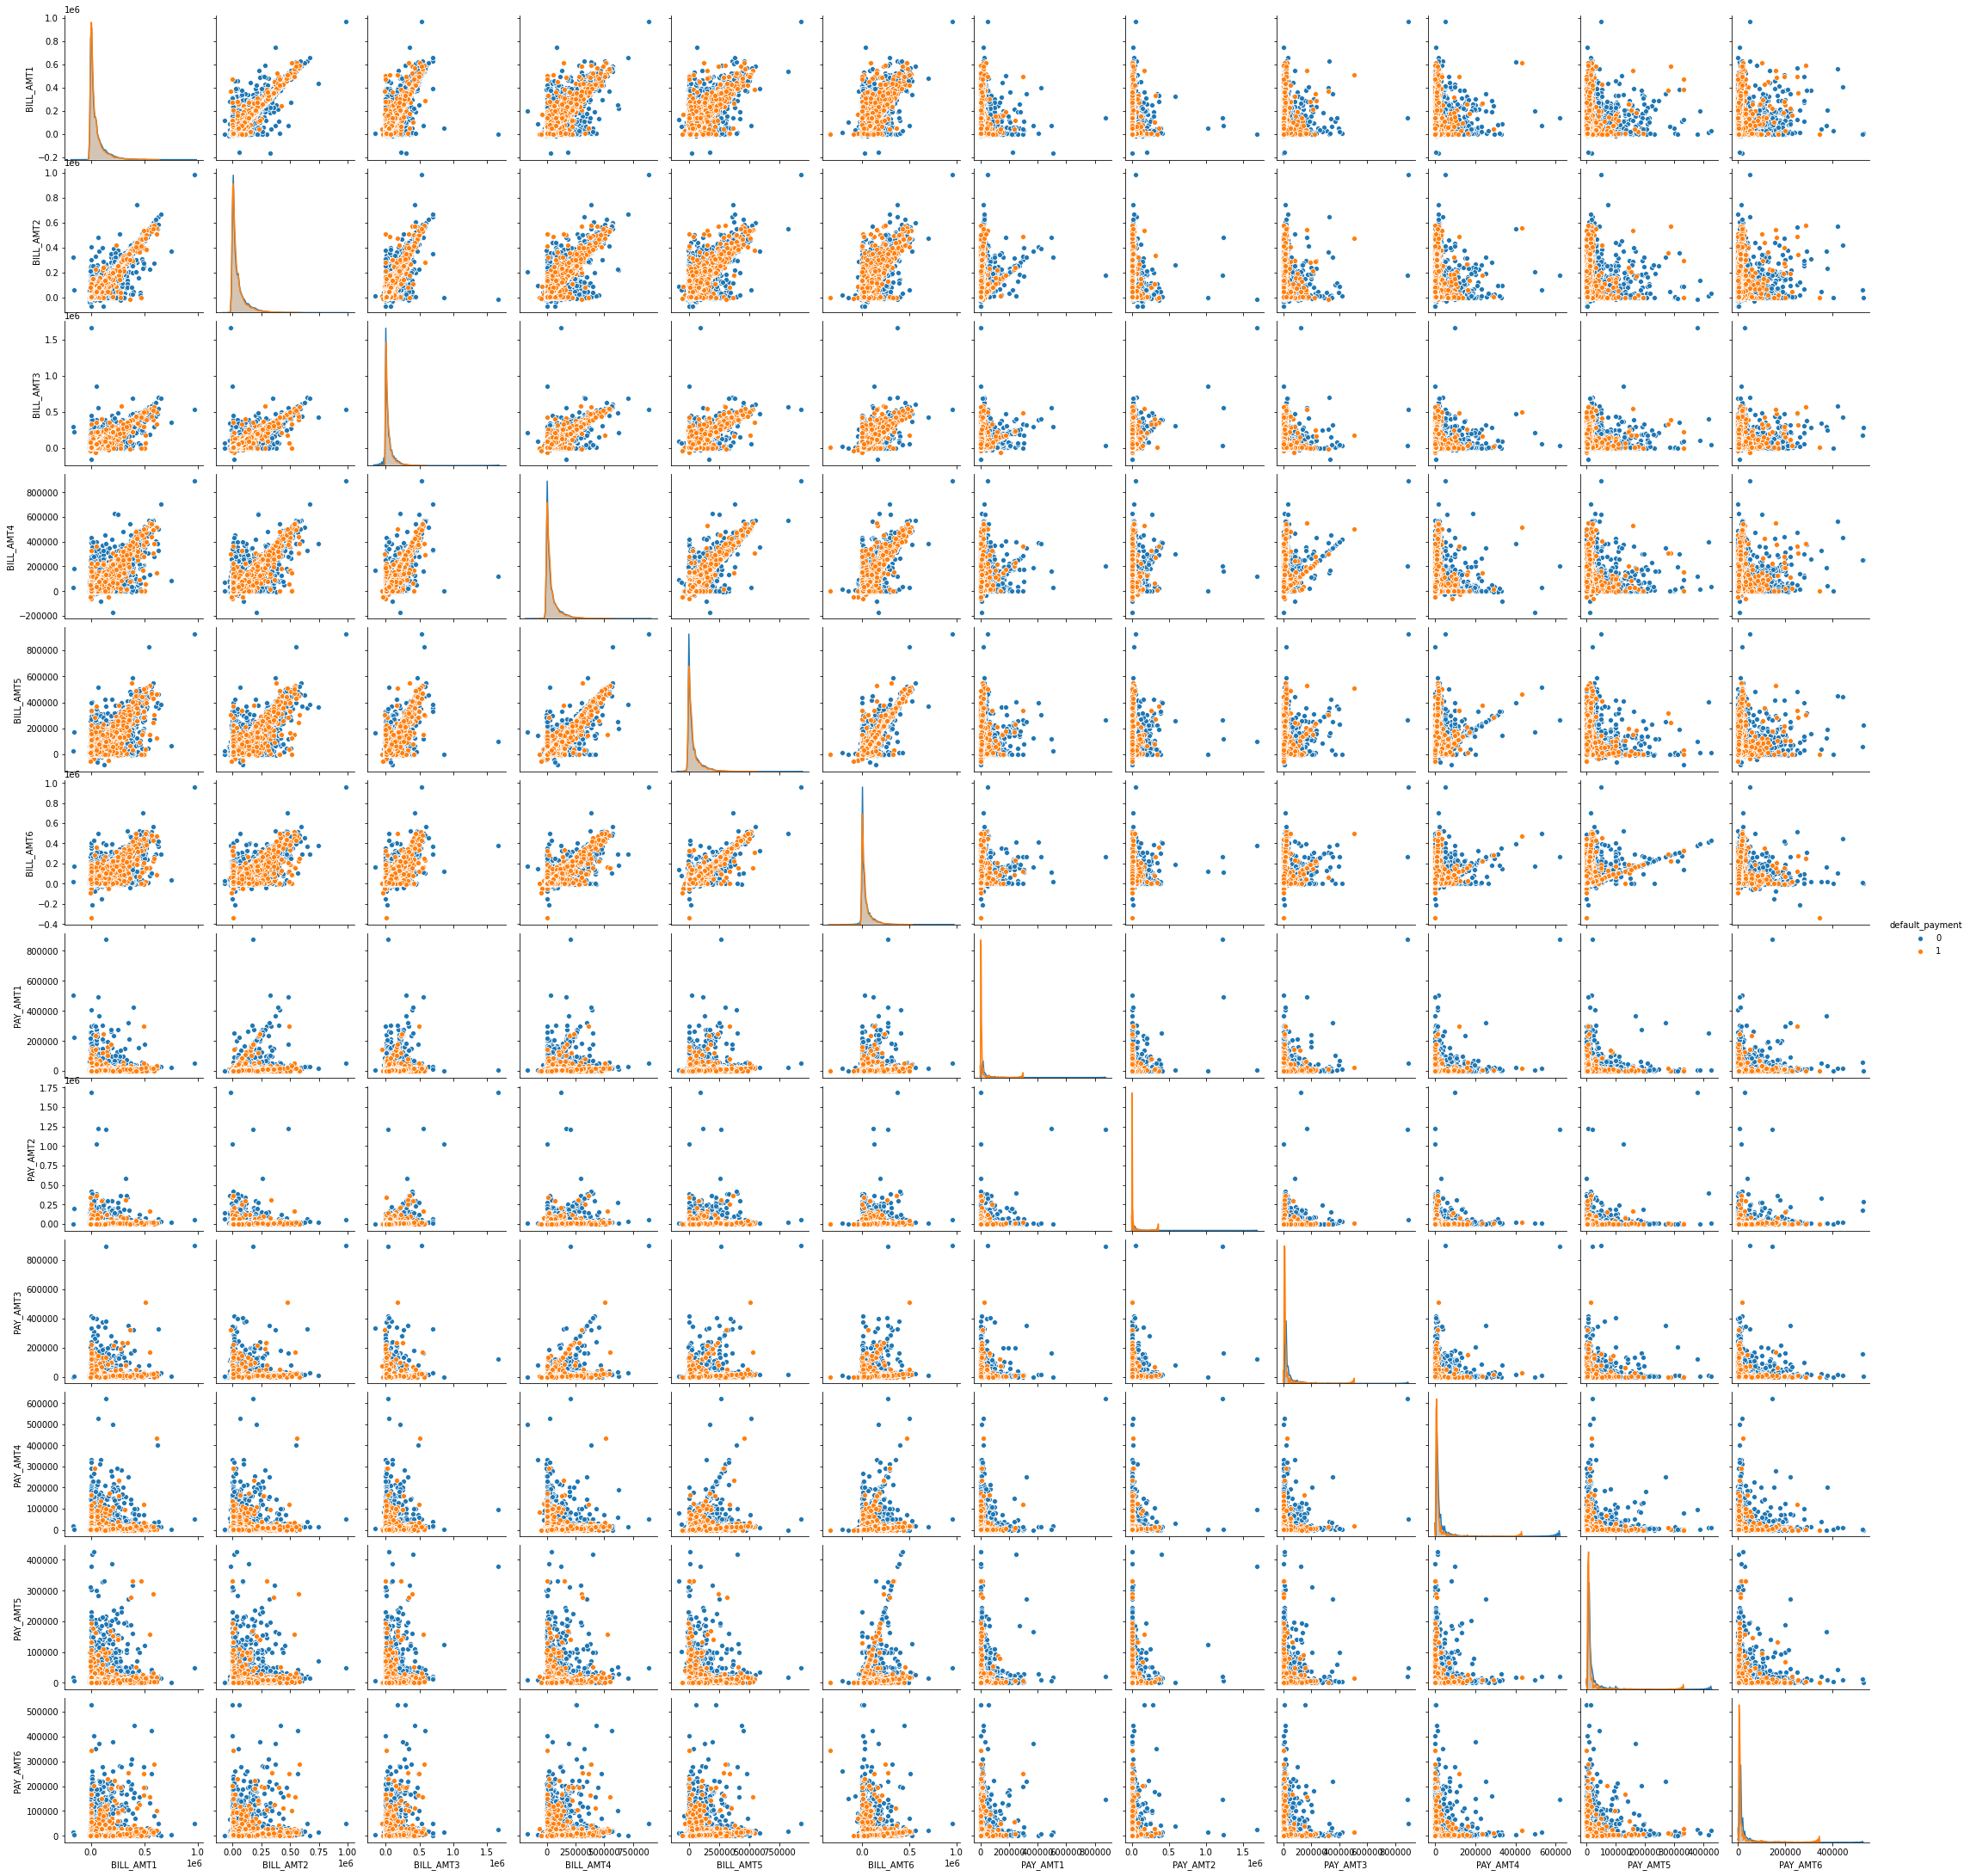

In [175]:
sns.pairplot(df_copy2, hue = 'default_payment')


**PAY_AMT1 IS RELEATED TO BILL_AMT2**

**PAY_AMT2 IS RELEATED TO BILL_AMT3**

:

:

**PAY_AMT5 IS RELEATED TO BILL_AMT6**


In [176]:
X=df.drop(['ID','default_payment'],axis=1)
Y=df.default_payment
X_cat=X[['SEX','EDUCATION','MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6']]
X_numeric=X.drop(['SEX','EDUCATION','MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6'],axis=1)

# Feature Selection

In [177]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [178]:
test = SelectKBest(score_func=f_classif, k=4)

In [179]:
fit = test.fit(X_numeric, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_numeric.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


In [180]:
print(featureScores.sort_values(by='Score',ascending=False))


        Specs       Score
0   LIMIT_BAL  724.068539
8    PAY_AMT1  160.403810
9    PAY_AMT2  103.291524
11   PAY_AMT4   97.188000
10   PAY_AMT3   95.218011
12   PAY_AMT5   91.429801
13   PAY_AMT6   85.089045
2   BILL_AMT1   11.580532
3   BILL_AMT2    6.044238
4   BILL_AMT3    5.944388
1         AGE    5.788556
5   BILL_AMT4    3.094745
6   BILL_AMT5    1.371087
7   BILL_AMT6    0.865820


Here the indexes are given But Anova is good for numerical(continuos) input feature and categorical(output).
**So top 4 features are LIMIT_bal,Pay_amt1,2,3**.

Let's look for categorical values.

In [181]:
from sklearn.feature_selection import chi2
test_c = SelectKBest(score_func=chi2, k=6)
fit_c = test_c.fit(X_cat, Y)


In [182]:
dfscores = pd.DataFrame(fit_c.scores_)
dfcolumns = pd.DataFrame(X_cat.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [183]:
print(featureScores.sort_values(by='Score',ascending=False))

       Specs        Score
3      PAY_1  7628.882307
4      PAY_2  6446.257979
5      PAY_3  5079.271680
6      PAY_4  4861.607505
7      PAY_5  4747.067922
8      PAY_6  4049.388340
1  EDUCATION    38.591193
0        SEX     7.146367
2   MARRIAGE     4.883939


In [184]:
print(featureScores.sort_values(by='Score',ascending=False))

       Specs        Score
3      PAY_1  7628.882307
4      PAY_2  6446.257979
5      PAY_3  5079.271680
6      PAY_4  4861.607505
7      PAY_5  4747.067922
8      PAY_6  4049.388340
1  EDUCATION    38.591193
0        SEX     7.146367
2   MARRIAGE     4.883939


Pay_X has very much important rather than any other values

# Feature engineering

SEX and Marraige are low values so we should work with these features.

**We will add MARRIAGE and SEX together to form a new feature.**

In [185]:
df['Status'] =0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'Status'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'Status'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 0)) , 'Status'] = 3 #divorced man/Widower
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'Status'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'Status'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 0)) , 'Status'] = 6 #divorced woman/widowed



In [186]:
p=df[["Status", "default_payment"]].groupby(['Status']).mean().sort_values(by='default_payment',ascending=False)

In [187]:
q=df.groupby(["Status", "default_payment"]).size().unstack(1)

In [188]:
pd.concat([q,p],axis=1)

,0,1,default_payment
Status,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


Married man are more likey to go into default than others.
Divorced man/Widower have more problems and can get into defaulter but their population is less.
Single woman are least likey to go into divorce.

Now let us bin the AGE Data.


In [189]:
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5

In [190]:
df.AgeBin.value_counts()

1    11013
2    10713
3     6005
4     1930
5      339
Name: AgeBin, dtype: int64

In [191]:
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0))]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,Status,AgeBin
9,10,20000,1,3,2,35,0,0,0,0,0,0,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,2,2
45,46,210000,1,1,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
196,197,150000,2,2,1,34,0,0,0,0,0,0,0,0,0,116,0,1500,0,0,116,0,1500,0,0,4,2
274,275,360000,2,2,2,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,1
301,302,440000,2,1,2,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162000,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836,29837,180000,1,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
29908,29909,140000,1,1,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
29909,29910,360000,1,1,2,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
29979,29980,180000,1,1,1,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2


In [192]:
df.loc[((df.PAY_2 > 0) & (df.BILL_AMT2 > 0) & (df.PAY_AMT2 > 0))]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment,Status,AgeBin
0,1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,4,1
1,2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,5,1
15,16,50000,2,3,0,23,1,2,0,0,0,0,50614,29173,28116,28771,29531,30211,0,1500,1100,1200,1300,1100,0,6,1
50,51,70000,1,3,2,42,1,2,2,2,2,0,37042,36171,38355,39423,38659,39362,0,3100,2000,0,1500,1500,1,2,3
53,54,180000,2,1,2,25,1,2,0,0,0,0,41402,41742,42758,43510,44420,45319,1300,2010,1762,1762,1790,1622,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29950,29951,220000,1,1,1,32,0,2,0,0,0,0,528,264,264,292,528,264,0,264,292,500,0,264,0,1,2
29955,29956,410000,1,1,2,32,0,2,0,0,0,0,380,190,190,380,190,1539,0,190,380,0,1539,0,0,2,2
29974,29975,50000,1,2,1,37,1,2,2,2,0,0,10904,9316,4328,2846,1585,1324,0,3000,0,0,1000,1000,1,1,2
29981,29982,50000,1,2,1,44,1,2,2,2,0,0,38671,36772,33101,28192,22676,14647,2300,1700,0,517,503,585,0,1,3


In [193]:
df['Acti_April']=1
df['Acti_May']=1
df['Acti_June']=1
df['Acti_July']=1
df['Acti_Aug']=1
df['Acti_Sept']=1
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0)),'Acti_Sept']=0
df.loc[((df.PAY_2 == 0) & (df.BILL_AMT2 == 0) & (df.PAY_AMT2 == 0)),'Acti_Aug']=0
df.loc[((df.PAY_3 == 0) & (df.BILL_AMT3 == 0) & (df.PAY_AMT3 == 0)),'Acti_July']=0
df.loc[((df.PAY_4 == 0) & (df.BILL_AMT4 == 0) & (df.PAY_AMT4 == 0)),'Acti_June']=0
df.loc[((df.PAY_5 == 0) & (df.BILL_AMT5 == 0) & (df.PAY_AMT5 == 0)),'Acti_May']=0
df.loc[((df.PAY_6 == 0) & (df.BILL_AMT6 == 0) & (df.PAY_AMT6 == 0)),'Acti_April']=0

In [194]:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'default_payment']].sample(20)


,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,default_payment
26132,0.021500,0.044367,0.058833,0.093700,0.119533,0.105200,0
9785,0.612925,0.627225,0.578325,0.603600,0.621762,0.612000,1
24164,0.020818,-0.007964,-0.038391,-0.033418,-0.014009,0.006900,1
26684,0.156200,0.015200,0.036650,0.078150,0.094300,0.045050,0
18738,0.986100,0.885767,0.871867,0.953167,0.864900,0.823833,1
6048,0.968065,0.962340,0.962135,0.952355,0.950610,0.947270,0
16294,0.110609,0.093636,0.103945,0.168136,0.146709,0.205291,1
26487,1.000000,1.000000,1.000000,1.000000,1.000000,0.906175,0
15628,0.892233,0.988078,0.988078,0.974189,0.988078,0.974111,0
22918,0.470400,0.470583,-0.005667,1.065075,0.984633,0.990300,0


In [195]:
X_cat_new=df[['Status','AgeBin','Acti_April','Acti_May','Acti_June','Acti_July','Acti_Aug','Acti_Sept']]

In [196]:
X_cat=pd.concat([X_cat,X_cat_new],axis=1)

In [197]:
df['Amt_paid_April']=(( (df['BILL_AMT6'] + df['PAY_AMT6'])-df['PAY_AMT5']))
df['Amt_paid_May']=(( (df['BILL_AMT5'] + df['PAY_AMT5'])-df['PAY_AMT4']))
df['Amt_paid_June']=(( (df['BILL_AMT4'] + df['PAY_AMT4'])-df['PAY_AMT3']))
df['Amt_paid_July']=(( (df['BILL_AMT3'] + df['PAY_AMT3'])-df['PAY_AMT2']))
df['Amt_paid_Aug']=(( (df['BILL_AMT2'] + df['PAY_AMT2'])-df['PAY_AMT1']))

In [198]:
"""X_numeric_new=df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1','Amt_paid_April','Amt_paid_May','Amt_paid_June','Amt_paid_July','Amt_paid_Aug']]"""

"X_numeric_new=df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',\n   'Closeness_1','Amt_paid_April','Amt_paid_May','Amt_paid_June','Amt_paid_July','Amt_paid_Aug']]"

In [199]:
df['Amt_paid_April']=(((df['BILL_AMT6'] + df['PAY_AMT6'])-df['PAY_AMT5']))/(df['BILL_AMT6'] + df['PAY_AMT6'])
df['Amt_paid_May']=(( (df['BILL_AMT5'] + df['PAY_AMT5'])-df['PAY_AMT4']))/(df['BILL_AMT5'] + df['PAY_AMT5'])
df['Amt_paid_June']=(( (df['BILL_AMT4'] + df['PAY_AMT4'])-df['PAY_AMT3']))/(df['BILL_AMT4'] + df['PAY_AMT4'])
df['Amt_paid_July']=(( (df['BILL_AMT3'] + df['PAY_AMT3'])-df['PAY_AMT2']))/(df['BILL_AMT3'] + df['PAY_AMT3'])
df['Amt_paid_Aug']=(( (df['BILL_AMT2'] + df['PAY_AMT2'])-df['PAY_AMT1']))/(df['BILL_AMT2'] + df['PAY_AMT2'])


In [200]:
import numpy as np

In [201]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [202]:
df.Amt_paid_April=df.Amt_paid_April.fillna(np.float(0))
df.Amt_paid_May=df.Amt_paid_May.fillna(np.float(0))
df.Amt_paid_June=df.Amt_paid_June.fillna(np.float(0))
df.Amt_paid_July=df.Amt_paid_July.fillna(np.float(0))
df.Amt_paid_Aug=df.Amt_paid_Aug.fillna(np.float(0))


In [203]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [204]:
np.any(np.isnan(df))


False

In [205]:
np.all(np.isfinite(df))

True

In [206]:
X_numeric_nn=df.drop(['ID','default_payment','SEX','EDUCATION','MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6','Status','AgeBin','Acti_April','Acti_May','Acti_June','Acti_July','Acti_Aug','Acti_Sept'],axis=1)

In [207]:
X_numeric_nn

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,Amt_paid_April,Amt_paid_May,Amt_paid_June,Amt_paid_July,Amt_paid_Aug
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1.000000,1.000000,1.000000,0.965550,0.844900,0.804350,0.000000,0.000000,0.000000,0.000000,1.000000
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0.972825,0.971208,0.972733,0.977650,0.985625,0.977650,1.000000,0.710564,0.765918,0.728408,1.000000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0.827233,0.833911,0.840767,0.849344,0.844144,0.675122,0.951336,0.937296,0.934773,0.896971,0.902235
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0.409060,0.420820,0.433720,0.014180,0.035340,0.060200,0.965005,0.963368,0.959203,0.960013,0.960201
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0.617380,0.617080,0.581200,0.283300,0.886600,0.827660,0.965220,0.546257,0.665999,0.199716,0.952776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0.927364,0.858014,0.599982,0.052886,0.123568,0.141145,0.705536,0.915915,0.945053,0.906265,0.960059
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,1.000000,0.965400,0.940140,0.976653,0.987813,0.988780,0.000000,0.975145,0.012077,0.717920,0.656892
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,0.354767,0.313933,0.304067,0.908067,0.888133,0.881167,0.910941,0.814011,0.122737,1.000000,1.000000
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,0.388200,0.851812,0.340325,0.046200,0.020262,1.020563,-0.043667,0.970286,0.978464,0.956003,-0.050276


In [208]:
fit = test.fit(X_numeric_nn, Y)

In [209]:
fit = test.fit(X_numeric_nn, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_numeric_nn.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [210]:
print(featureScores.sort_values(by='Score',ascending=False))

             Specs       Score
0        LIMIT_BAL  724.068539
14     Closeness_6  463.657005
15     Closeness_5  432.050382
16     Closeness_4  408.623100
17     Closeness_3  327.379373
18     Closeness_2  297.159000
19     Closeness_1  224.399565
8         PAY_AMT1  160.403810
9         PAY_AMT2  103.291524
11        PAY_AMT4   97.188000
10        PAY_AMT3   95.218011
12        PAY_AMT5   91.429801
13        PAY_AMT6   85.089045
2        BILL_AMT1   11.580532
24    Amt_paid_Aug   11.268829
3        BILL_AMT2    6.044238
4        BILL_AMT3    5.944388
1              AGE    5.788556
5        BILL_AMT4    3.094745
6        BILL_AMT5    1.371087
20  Amt_paid_April    0.959736
7        BILL_AMT6    0.865820
21    Amt_paid_May    0.481691
23   Amt_paid_July    0.359837
22   Amt_paid_June    0.309079


# Find my balance and learn my machine

In [211]:
features=['LIMIT_BAL',  'EDUCATION', 'MARRIAGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
      'Status', 'AgeBin', 'Acti_April', 'Acti_May',
       'Acti_June', 'Acti_July', 'Acti_Aug', 'Acti_Sept', 'Closeness_6',
       'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
       'Closeness_1']

**'Amt_paid_April', 'Amt_paid_May', 'Amt_paid_June',
       'Amt_paid_July', 'Amt_paid_Aug'**
These feature doesn't contribute much so we are eliminating before finally running the model. 

In [212]:
X=df[features].copy()

We will carry three type of sampling

upsampling

downsampling

Smote


In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [215]:
from sklearn.utils import shuffle

**Upsampling**


In [216]:
df_train = X_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Status,AgeBin,Acti_April,Acti_May,Acti_June,Acti_July,Acti_Aug,Acti_Sept,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,default_payment
6446,260000,0,1,0,0,0,0,0,0,9507,4405,0,2776,0,0,4405,0,2776,0,0,0,4,3,0,0,1,1,1,1,1.000000,1.000000,0.989323,1.000000,0.983058,0.963435,0
29133,350000,1,1,0,0,0,0,0,0,0,0,0,0,0,42800,0,0,0,0,42800,0,4,4,1,1,0,0,0,0,0.877714,1.000000,1.000000,1.000000,1.000000,1.000000,0
4638,50000,1,1,0,0,0,0,0,0,35145,36275,37150,0,0,0,2000,1871,0,0,0,0,1,3,0,0,0,1,1,1,1.000000,1.000000,1.000000,0.257000,0.274500,0.297100,0
8062,220000,2,2,0,0,0,0,0,0,2501,2071,0,0,0,0,1000,0,0,0,0,0,2,1,0,0,0,0,1,1,1.000000,1.000000,1.000000,1.000000,0.990586,0.988632,0
2625,30000,3,1,0,0,0,0,0,0,9819,10873,9646,9995,10371,5139,1230,1100,419,600,500,500,4,4,1,1,1,1,1,1,0.828700,0.654300,0.666833,0.678467,0.637567,0.672700,0
14595,50000,2,1,0,0,2,0,0,0,96393,100459,96051,18051,18767,19462,5800,300,18000,1000,1000,1000,1,1,1,1,1,1,1,1,0.610760,0.624660,0.638980,-0.921020,-1.009180,-0.927860,0
21378,500000,2,1,0,0,0,0,0,0,-3182,-3885,1474,555,1096,1349,0,5359,555,1096,1349,2358,1,4,1,1,1,1,1,1,0.997302,0.997808,0.998890,0.997052,1.007770,1.006364,0
13132,200000,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
11726,40000,2,1,0,0,0,0,0,0,36917,38260,32680,23472,25436,34309,2000,2000,1000,3000,10000,1142,1,3,1,1,1,1,1,1,0.142275,0.364100,0.413200,0.183000,0.043500,0.077075,0
24014,50000,2,2,0,0,0,0,0,0,12236,13324,14403,15460,15804,16549,1300,1300,1300,600,1000,602,2,1,1,1,1,1,1,1,0.669020,0.683920,0.690800,0.711940,0.733520,0.755280,0


In [217]:
from sklearn.utils import resample
df_majority = df_train[df_train.default_payment==0]
df_minority = df_train[df_train.default_payment==1]


In [218]:
print(df_majority.default_payment.count())
print("-----------")
print(df_minority.default_payment.count())
print("-----------")
print(df_train.default_payment.count())

18677
-----------
5323
-----------
24000


In [219]:

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18677,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default_payment.value_counts()

1    18677
0    18677
Name: default_payment, dtype: int64

In [220]:
X_up_train, y_up_train=df_upsampled[features].copy(),df_upsampled.default_payment
X_up_train, y_up_train=shuffle(X_up_train, y_up_train)

**Downsampling**

In [221]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5323,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default_payment.value_counts()

1    5323
0    5323
Name: default_payment, dtype: int64

In [222]:
X_down_train, y_down_train=df_downsampled[features].copy(),df_downsampled.default_payment
X_down_train, y_down_train=shuffle(X_down_train, y_down_train)


In [223]:
X_down_train.shape

(10646, 35)

**SMOTE**

In [224]:
from imblearn.over_sampling import SMOTE



In [225]:

sm = SMOTE(random_state=589, ratio = 1.0)
X_SMOTE, y_SMOTE = sm.fit_sample(X, Y)
print(len(y_SMOTE))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


46728


In [226]:

X_SMOTE_train, X_SMOTE_test,y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.20, random_state=42)


In [227]:
X_SMOTE.shape

(46728, 35)

**Modelling**

In [228]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [229]:
from xgboost import XGBClassifier

In [230]:
def model_score(X_train,Y_train):
  class_list=[ DecisionTreeClassifier(max_depth=3,class_weight='balanced'),
            RandomForestClassifier(n_estimators=100,class_weight='balanced'),
            AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,class_weight='balanced'),n_estimators =100),
                              GradientBoostingClassifier() ,
            XGBClassifier()]
  for clf in class_list:
    clf.fit(X_train, Y_train)
    print(clf.score(X_test, y_test))
      


In [231]:
model_score(X_train,y_train)

0.7608333333333334
0.8118333333333333
0.7225
0.8198333333333333
0.8193333333333334


In [233]:
model_score(X_up_train,y_up_train)

0.7708333333333334
0.809
0.7315
0.7545
0.7548333333333334


In [234]:
model_score(X_down_train,y_down_train)

0.7595
0.7363333333333333
0.685
0.7518333333333334
0.7521666666666667


In [235]:
def model_score_SMOTE(X_train,Y_train):
  class_list=[ DecisionTreeClassifier(max_depth=10,class_weight='balanced'),
            RandomForestClassifier(n_estimators=100,class_weight='balanced'),
            AdaBoostClassifier(DecisionTreeClassifier(max_depth=3,class_weight='balanced'),n_estimators =100),
                              GradientBoostingClassifier() ,
            XGBClassifier()]
  for clf in class_list:
    clf.fit(X_train, Y_train)
    print(clf.score(X_SMOTE_test, y_SMOTE_test))

In [236]:
model_score_SMOTE(X_SMOTE_train,y_SMOTE_train)

0.8441044297025465
0.8778086882088594
0.865931949497111
0.872993794136529
0.8726728011983736


In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer

In [238]:
classifier = DecisionTreeClassifier(max_depth=10, random_state=14)

In [239]:
classifier.fit(X_SMOTE_train,y_SMOTE_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=14, splitter='best')

In [240]:
predictions = classifier.predict(X_SMOTE_test)

In [241]:
accuracy_score(y_true = y_SMOTE_test, y_pred = predictions)

0.8472073614380483

In [242]:
from sklearn.model_selection import GridSearchCV

In [248]:
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have
#acc_scorer = make_scorer(f1_score)

In [249]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

In [252]:
grid_tree.fit(X_SMOTE_train,y_SMOTE_train)

ValueError: ignored